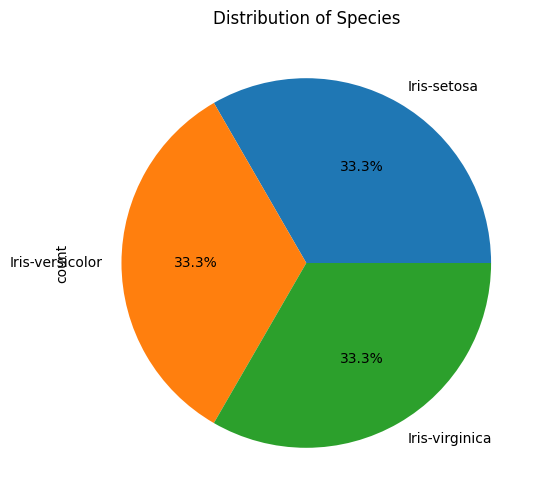

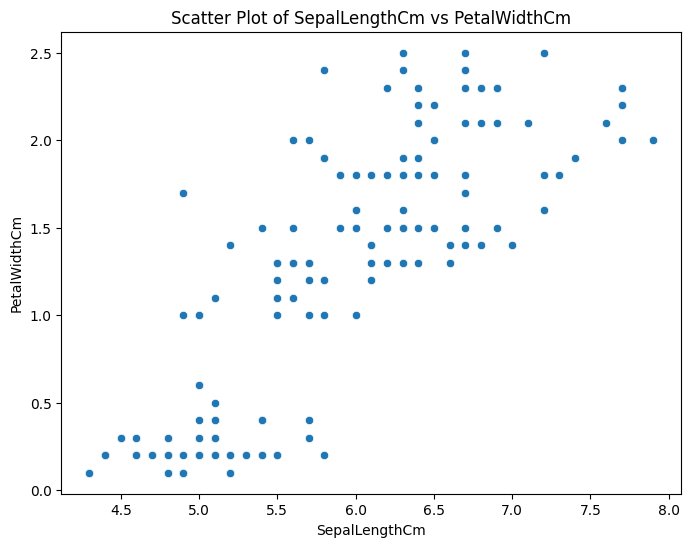

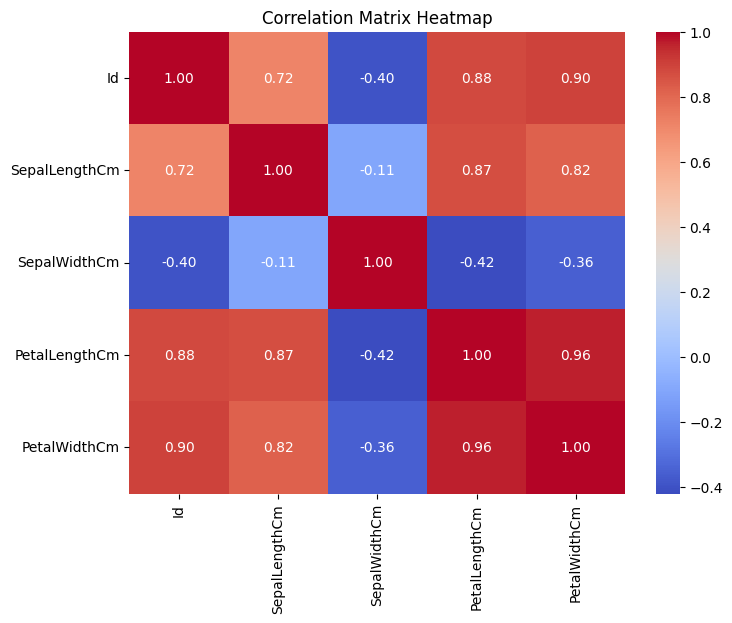

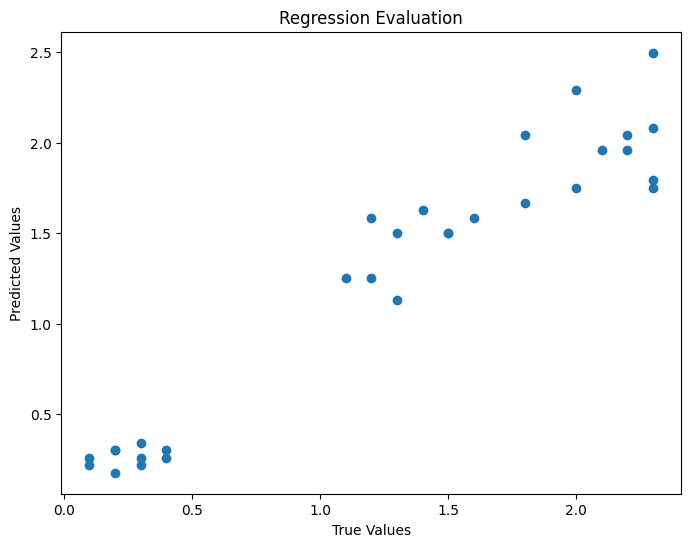

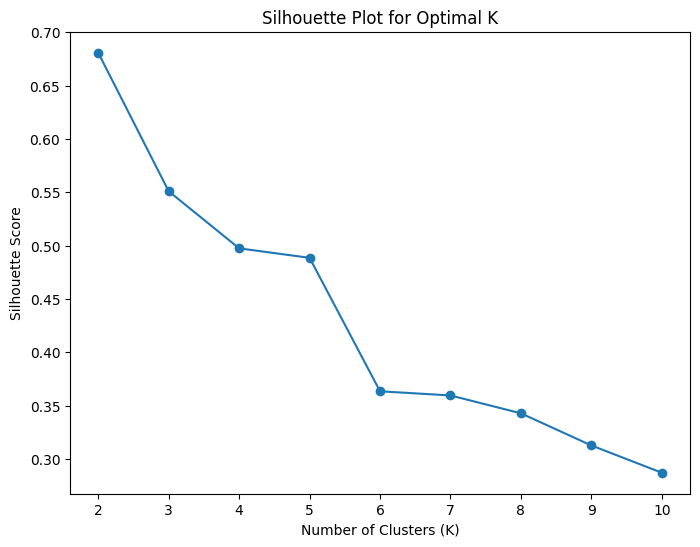

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
def load_dataset():
    return pd.read_csv('Iris.csv')

# Function to create histogram, bar chart, or pie chart
def plot_distribution(data, column):
    plt.figure(figsize=(8, 6))
    if data[column].dtype == 'object':  # Categorical column
        data[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Distribution of {column}')
    else:  # Numerical column
        sns.histplot(data=data, x=column, bins=20, kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.show()

# Function to create line or scatter graph
def plot_relationship(data, x_column, y_column):
    plt.figure(figsize=(8, 6))
    if data[y_column].dtype == 'object':  # Categorical y_column
        sns.scatterplot(data=data, x=x_column, y=y_column, hue=y_column)
        plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    else:  # Numerical y_column
        sns.scatterplot(data=data, x=x_column, y=y_column)
        plt.title(f'Scatter Plot of {x_column} vs {y_column}')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
    plt.show()

# Function to create confusion matrix or heatmap
# Function to create heatmap
def plot_heatmap(data):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include='number')
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()
    
# Function to create confusion matrix or heatmap
def plot_regression_evaluation(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred)
    plt.title('Regression Evaluation')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Function to create elbow or silhouette plot
def plot_cluster_evaluation(X, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, cluster_labels))
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Plot for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.show()

# Function to perform k-means clustering
def perform_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    return kmeans.fit_predict(X)

# Function to perform linear regression fitting
def perform_linear_regression(X_train, X_test, y_train, y_test):
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    return reg, predictions

# Main function for analysis
def main():
    # Step 1: Load the Iris dataset
    data = load_dataset()
    
    # Step 2: Visualizations
    # Histogram/bar chart/pie chart
    plot_distribution(data, 'Species')
    
    # Line/scatter graph
    plot_relationship(data, 'SepalLengthCm', 'PetalWidthCm')
    
    # Heatmap
    plot_heatmap(data)
    
    # Step 3: Clustering and fitting
    # Encode categorical labels for clustering
    label_encoder = LabelEncoder()
    data['Species'] = label_encoder.fit_transform(data['Species'])
    
    X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
    y = data['Species']
    
    # Perform k-means clustering
    cluster_labels = perform_clustering(X, 3)
    
    # Perform linear regression fitting
    X_train, X_test, y_train, y_test = train_test_split(data[['PetalLengthCm']], data['PetalWidthCm'], test_size=0.2, random_state=42)
    reg_model, predictions = perform_linear_regression(X_train, X_test, y_train, y_test)
    
    # Step 4: Evaluation
    # Regression evaluation
    plot_regression_evaluation(y_test, predictions)
    
    # Elbow/silhouette plot
    plot_cluster_evaluation(X)

# Execute main function
if __name__ == "__main__":
    main()
